In [61]:
import matplotlib.pyplot as plt

from nltk.lm import NgramCounter
from nltk.util import ngrams
from nltk.lm.preprocessing import padded_everygram_pipeline
from nltk.lm import MLE

import numpy as np
import pandas as pd

In [2]:
text_df = pd.read_pickle("datasets/text_dataset.pickle")
text_df.dropna(inplace=True)
text_df['text1'] = text_df['task1_text'].apply(lambda x: x.split(" "))
text_df['text2'] = text_df['task2_text'].apply(lambda x: x.split(" "))
text_df['text3'] = text_df['task3_text'].apply(lambda x: x.split(" "))

In [70]:
text_df['text_len'] = text_df['text1'].str.len() + text_df['text2'].str.len() + text_df['text3'].str.len()

In [168]:
max_n = 5

def texts_bigram_probabilities(texts, n):
    train, vocab = padded_everygram_pipeline(n, texts)
    lm = MLE(n)
    lm.fit(train, vocab)
    
    scores = []
    for text in texts:
        if n > 1:
            text = ['<s>'] + text + ['</s>']
        score = 0
        for i in range(n-1, len(text)):
            word = text[i]
            context = text[i-(n-1): i]
            score += lm.logscore(word, context)
        score /= len(text)
        scores.append(score)
        
    return scores


for i in range(max_n):
    i+=1
    text_df[f'score{i}_1'] = texts_bigram_probabilities(text_df['text1'], i)
    text_df[f'score{i}_2'] = texts_bigram_probabilities(text_df['text2'], i)
    text_df[f'score{i}_3'] = texts_bigram_probabilities(text_df['text3'], i)
    text_df[f'score{i}']  = text_df[[f'score{i}_1', f'score{i}_2', f'score{i}_3']].aggregate(np.sum, axis=1)

/home/akkyma/anaconda3/envs/vosk/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars


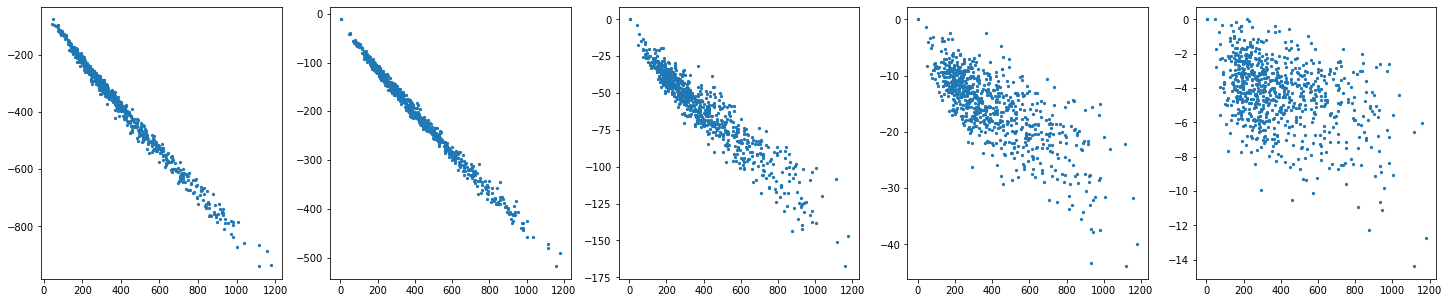

In [169]:
fig, axes = plt.subplots(1, max_n, figsize=(max_n*5, 5))
for i in range(0, max_n):
    axes[i].scatter(text_df['text_len'], text_df[f'score{i+1}'], s=5)

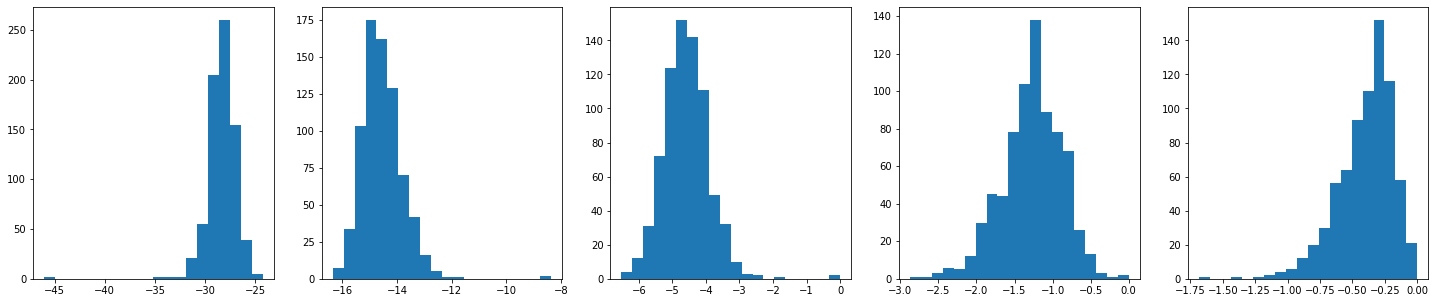

In [106]:
fig, axes = plt.subplots(1, max_n, figsize=(max_n*5, 5))
for i in range(0, max_n):
    axes[i].hist(text_df[f'score{i+1}'], bins=20)

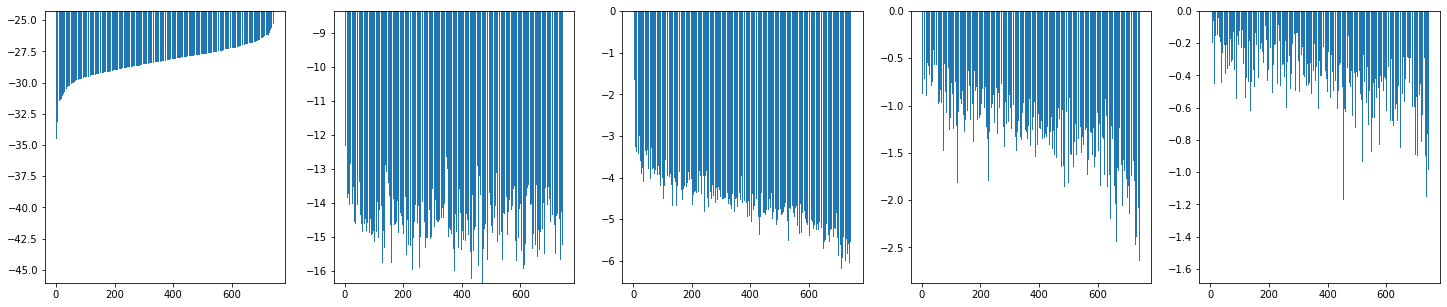

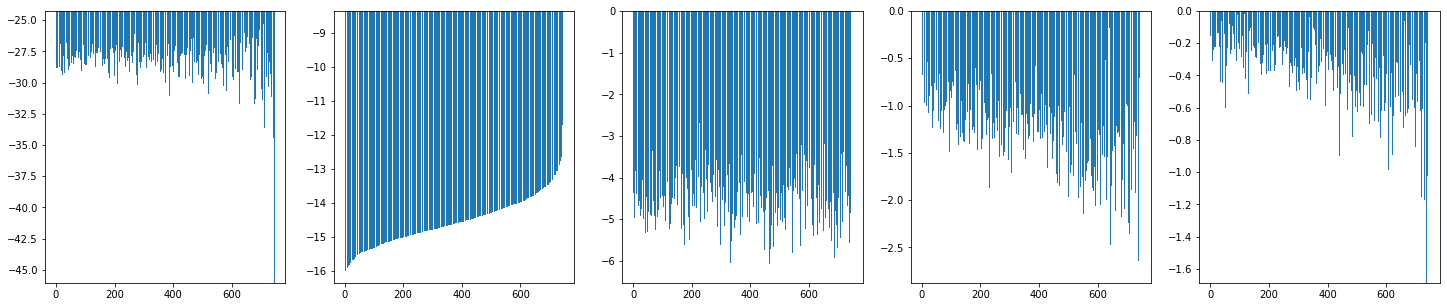

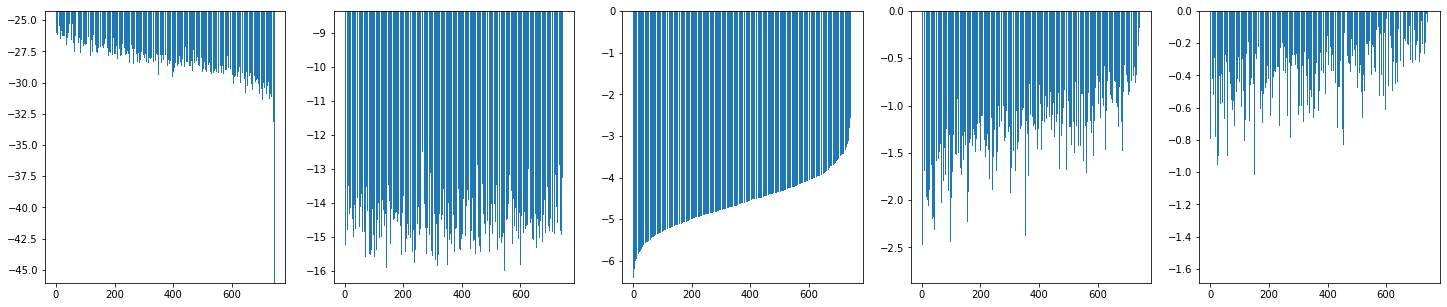

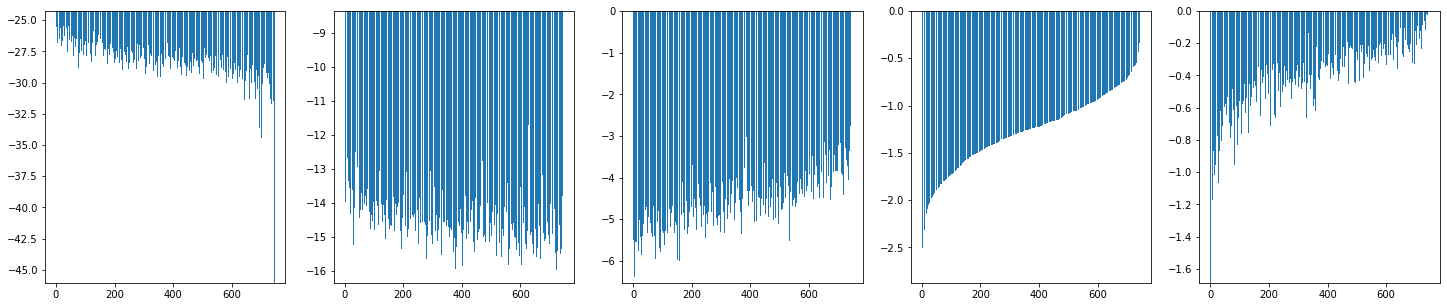

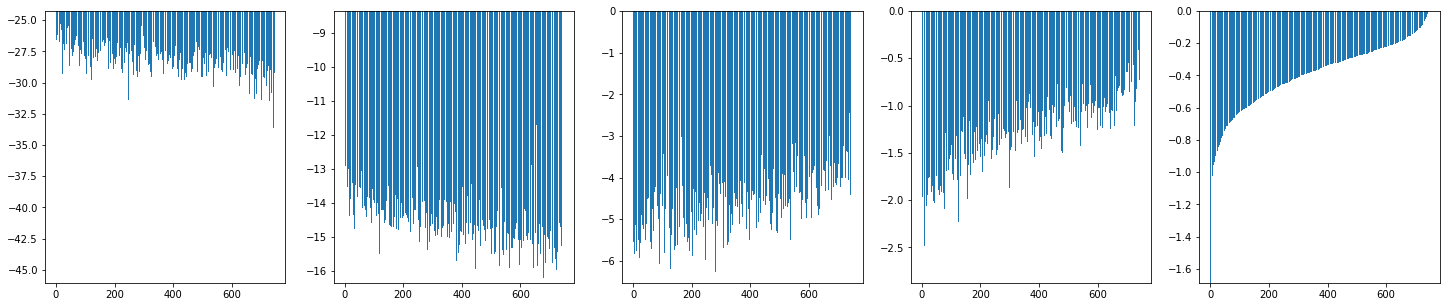

In [107]:
for i in range(0, max_n):
    fig, axes = plt.subplots(1, max_n, figsize=(max_n*5, 5))
    sort_df = text_df.sort_values(f'score{i+1}')
    for j in range(0, max_n):
        serie = sort_df[f'score{j+1}']
        min_, max_ = serie.min(), serie.max()
        axes[j].bar(range(len(sort_df)), sort_df[f'score{j+1}'])
        axes[j].set_ylim(min_, max_)

<BarContainer object of 747 artists>

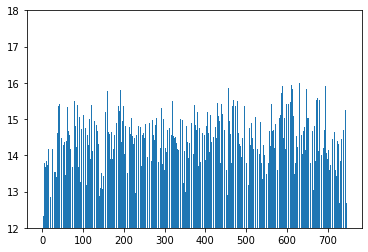

In [92]:
axes = plt.axes()
axes.set_ylim(12, 18)
axes.bar(range(len(sort_df)), sort_df['score2'].abs())

In [108]:
score_df = pd.read_pickle("datasets/score_dataset.pickle")
merge_df = pd.merge(text_df, score_df, on='email')

In [109]:
norm_df = (merge_df - merge_df.mean()) / merge_df.std()

In [136]:
print(norm_df.corrwith(norm_df['score5']))

AV/VR       0.469485
len         0.412573
score1     -0.559798
score1_1   -0.371761
score1_2   -0.593927
              ...   
corr1            NaN
corr2            NaN
corr3            NaN
corr4            NaN
corr5            NaN
Length: 64, dtype: float64


In [117]:
correlation = abs(norm_df.corrwith(norm_df[[f'score{i+1}' for i in range(max_n)]]))

In [120]:
correlation

1.0

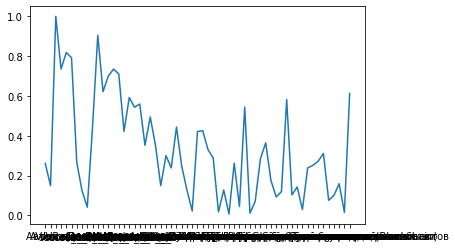

In [113]:
fig, axes = plt.subplots(2, max_n, figsize=(max_n*5, 5))
for i in range(max_n):
    sort_df = norm_df.sort_values(f"score{i+1}")
    axes[i].plot(sort_df[''])
    axes[i].plot(sort_df[])

In [61]:
counts = (norm_df[correlations.keys()] == norm_df[correlations.keys()]).sum()

In [111]:
pos = 31
print(correlations.iloc[pos], counts.iloc[pos])

NameError: name 'counts' is not defined

In [16]:
import seaborn

In [25]:
val_df = merge_df.drop(labels=['email', 'task1_text', 'task2_text', 'task3_text', 'text1', 'text2', 'text3', 'score', 'score1', 'score2', 'score3'], axis=1)

In [30]:
val_df.to_numpy()

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan,  1.,  1., ..., nan,  1., nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [13]:
merge_df.mean() - merge_df[:100].mean()

score1                                             0.024394
score2                                             0.009539
score3                                             0.017018
score                                              0.050950
проактивность, инновативность                     -0.214286
готовность к изменениям                            0.132787
Коммуникация                                       0.167758
Тиминг и командное взаимодействие                 -0.086047
Работа с будущим                                  -0.006124
Практики мышления                                 -0.154762
Креативность и работа с неопределенностью         -0.416667
Управление ресурсными состояниями                 -1.275000
Самоорганизация и самоактуализация                -0.091365
Кросскультурность                                  0.107143
Лидерство                                         -1.904762
Цифровые образовательные технологии                0.096154
Дизайн образования                      

In [39]:
(merge_df[:100] == merge_df[:100]).sum()

email                                              100
task1_text                                         100
task2_text                                         100
task3_text                                         100
text1                                              100
text2                                              100
text3                                              100
score1                                             100
score2                                             100
score3                                             100
score                                              100
проактивность, инновативность                        6
готовность к изменениям                             10
Коммуникация                                        13
Тиминг и командное взаимодействие                    5
Работа с будущим                                     9
Практики мышления                                    3
Креативность и работа с неопределенностью            3
Управление

In [163]:
n = 2

train, vocab = padded_everygram_pipeline(n, text_df['text1'])
lm = MLE(n)
lm.fit(train, vocab)

probs = []
for text in text_df['text1']:
    tokens = ngrams(text, n)
    for token in tokens:
        score = lm.score(token[0], token[1:])
#         if score > 0.5:
#             print(token)
        probs.append(score)

In [164]:
sorted_probs = sorted(probs)

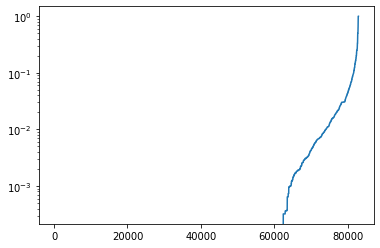

In [166]:
plt.plot(sorted_probs)
plt.yscale('log')